In [ ]:

#setup  aws cli, put region 
#brows data aws s3 ls s3://commoncrawl/
#Load data  aws s3 cp s3://commoncrawl/crawl-data/CC-NEWS/2018/03/CC-NEWS-20180321113442-00063.warc.gz .

In [1]:
file_content=[]
import gzip
with gzip.open("CC-NEWS-20180321113442-00063.warc.gz",'r') as f:
    for line in f:
        file_content.append(line)
        
        

In [2]:
file_content[0]

b'WARC/1.0\r\n'

In [3]:
len(file_content)

59787600

In [4]:
def get_html(rows):
    collect=False
    html=""
    for  row in rows:
        if row=='<!DOCTYPE html>\n':
            collect=True    
        
        if collect:    
            html=html+row.strip('\n\r')
            
        if row=='</html>\r\n':
            return html
    return html

In [5]:
def parse_site(rows):
    site={}
    site['url']=rows[0][17:-2]
    site['html'] = get_html(rows)
    return site

In [6]:
sites=[]
from tqdm import tqdm
start = 0
for i in tqdm(range(0, len(file_content))):
    row =  file_content[i].decode(encoding='latin-1')
    file_content[i]=row
    if row.startswith('WARC-Target-URI:'):        
        if start>0:
            sites.append(parse_site(file_content[start:i]))
        start =i

100%|██████████| 59787600/59787600 [01:12<00:00, 821633.33it/s]


In [7]:
len(sites)

39284

In [8]:
sites[0]

{'html': '<!DOCTYPE html><html lang="es"><head><meta http-equiv="Content-Type" content="text/html; charset=iso-8859-15"/><meta http-equiv="X-UA-Compatible" content="IE=edge;chrome=1"/><title data-ue-u="title" data-ue-c="innerHTML">La nueva norma de ruido de Castellón fija el horario &apos;diurno&apos; hasta las 23.00 horas | Castellón</title> <link rel="stylesheet" type="text/css" href="https://e00-elmundo.uecdn.es/assets/v8/css/core-noticia-elmundo-desktop.css"><!--[if lte IE 9]>    <link href="https://e00-elmundo.uecdn.es/assets/v8/css/core-noticia-elmundo-desktop-ie.css" media="all" rel="stylesheet" type="text/css"/><![endif]--> <meta data-ue-u="description" name="description" content="La nueva ordenanza de regularización del ruido en Castellón alarga el horario &amp;apos;diurno&amp;apos; hasta las 23.00 horas, lo que implica poder emitir hasta 65 decibelios (dB) de cont"/><meta data-ue-u="keywords" name="keywords" content="comunidad-valenciana/castellon,Castellón,Comunidad Valencia

In [22]:
#readability-lxml
import requests
from readability.readability import Document
response = requests.get(sites[0]['url'])
readable_article = Document(response.text)
readable_article.title()

"La nueva norma de ruido de Castellón fija el horario 'diurno' hasta las 23.00 horas | Castellón"

In [24]:
for i in tqdm(range(0, len(sites))):
    try:
        sites[i]['title']= Document(sites[i]['html']).title()
    except:
        sites[i]['title']=''

100%|██████████| 39284/39284 [04:03<00:00, 161.59it/s]


In [29]:
from urllib import parse
def get_domen_len(url):
    res = parse.urlsplit(url)
    return res.netloc, res.netloc[res.netloc.rfind('.')+1:]
get_domen_len(sites[0]['url'])

('www.elmundo.es', 'es')

In [30]:
for i in tqdm(range(0, len(sites))):
    try:
        domen, l = get_domen_len(sites[i]['url'])
        sites[i]['domen']= domen
        sites[i]['len']= l

    except:
        sites[i]['domen']=''
        sites[i]['len']=''        

100%|██████████| 39284/39284 [00:00<00:00, 131220.43it/s]


In [32]:
import pandas as pd
df = pd.DataFrame(sites)

In [33]:
df[:5]

,domen,html,len,title,url
0,www.elmundo.es,"<!DOCTYPE html><html lang=""es""><head><meta htt...",es,La nueva norma de ruido de Castellón fija el h...,http://www.elmundo.es/comunidad-valenciana/cas...
1,www.vanguardngr.com,"<!DOCTYPE html><html lang=""en-US"" prefix=""og: ...",com,Better late than never for Alonso after Spain ...,https://www.vanguardngr.com/2018/03/better-lat...
2,www.fyens.dk,,dk,,https://www.fyens.dk/article/3240858?rss
3,www.pravo.cz,,cz,,http://www.pravo.cz/p068r11a.php
4,raiderswire.usatoday.com,"<!DOCTYPE html><!--[if IE 8]> <html lang=""en"" ...",com,5 things to know about Raiders new CB Shareece...,https://raiderswire.usatoday.com/2018/03/19/sh...


In [36]:
df['domen'].value_counts()

au.news.yahoo.com                  1616
news.rambler.ru                    1119
e.vnexpress.net                     927
www.finanznachrichten.de            564
www.zazoom.it                       527
www.aktiencheck.de                  384
www.reuters.com                     381
sport.rambler.ru                    373
svodka.net                          233
www.dailymail.co.uk                 232
www.diariovasco.com                 230
triblive.com                        197
www.nownews.com                     170
ici.radio-canada.ca                 169
www.diariodemallorca.es             160
www.ziare-pe-net.ro                 156
www.radiotimes.com                  149
www.express.co.uk                   149
www.aydinses.com                    148
www.mynet.com                       148
www.teinteresa.es                   140
www.dallasnews.com                  121
www.infranken.de                    118
www.ziuanews.ro                     118
www.diariodelweb.it                 114


In [35]:
df['len'].value_counts()

com         13515
de           3232
ru           2758
it           2056
net          1930
es           1439
uk           1399
ro            874
gr            762
fr            623
se            615
nl            564
ua            550
hu            509
ca            471
org           371
be            367
at            350
pl            316
ch            299
cz            298
bg            293
tr            289
pt            262
no            238
ar            236
br            220
fi            220
info          216
dk            212
            ...  
me             11
ug             10
mk             10
bz             10
lb             10
mt             10
com:443        10
xn--p1ai        9
fm              8
pn              7
hk              7
ke              6
pa              6
pro             6
mc              6
az              5
dz              4
gi              4
io              3
lk              3
kg              3
gal             3
ad              3
hn              2
sc        

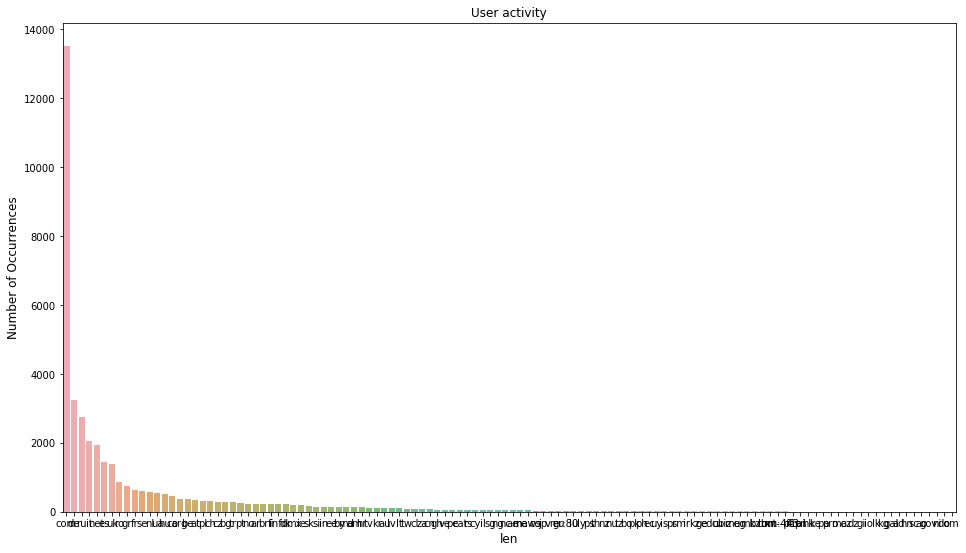

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

len = df['len'].value_counts()
plt.figure(figsize=(16,9))
sns.barplot(len.index, len.values, alpha=0.8)
plt.title('User activity')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('len', fontsize=12)
plt.show()

In [38]:
from nltk import ngrams

def get_ngrams(ngram_range, sentenses): 
    words=[]
    for n in ngram_range:
        for name in sentenses:
            words=words+ [ ' '.join(ngram) for ngram in   ngrams(name.split(), n)]
    return words


words = get_ngrams(range(2,4),df['title'].values)
from collections import Counter
word_counter = Counter(words)
word_counter.most_common(200)

Z:\anaconda\envs\py_36\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: generator 'ngrams' raised StopIteration
  import sys


[('â\x80\x94 Ð', 1514),
 ('Ð Ð°Ð¼Ð±Ð"ÐµÑ\x80/Ð½Ð¾Ð²Ð¾Ñ\x81Ñ\x82Ð¸', 1119),
 ('â\x80\x94 Ð Ð°Ð¼Ð±Ð"ÐµÑ\x80/Ð½Ð¾Ð²Ð¾Ñ\x81Ñ\x82Ð¸', 1119),
 ('Ð Ð°Ð¼Ð±Ð"ÐµÑ\x80/Ñ\x81Ð¿Ð¾Ñ\x80Ñ\x82', 373),
 ('â\x80\x94 Ð Ð°Ð¼Ð±Ð"ÐµÑ\x80/Ñ\x81Ð¿Ð¾Ñ\x80Ñ\x82', 373),
 ('| www.diariovasco.com', 221),
 ('de la', 201),
 ('| The', 185),
 ('Mirror Online', 154),
 ('| Express.co.uk', 149),
 ('| Diario', 140),
 ('- BBC', 130),
 ('| Dallas', 124),
 ('Dallas News', 121),
 ('| Dallas News', 121),
 ('Noticias de', 109),
 ('- allAfrica.com', 105),
 ('- Süddeutsche.de', 102),
 ('- Ð¢Ð\x90Ð¡Ð¡', 98),
 ('- ¥é¥¤¥Ö¥É¥¢¥Ë¥å¡¼¥¹', 98),
 ('Ð Ð¾Ñ\x81Ñ\x81Ð¸Ð¸', 95),
 ('| STERN.de', 94),
 ('y el', 93),
 ('News |', 93),
 ('| El', 90),
 ('BBC News', 90),
 ('- BBC News', 90),
 ('- EcoDiario.es', 88),
 ('- Gazzetta', 88),
 ('| HAON', 85),
 ('The Seattle', 83),
 ('Seattle Times', 83),
 ('| The Seattle', 83),
 ('The Seattle Times', 83),
 ('- Irish', 78),
 ('Irish Mirror', 78),
 ('| Metro', 78),
 ('- Irish Mirror', 78),
 ('Irish Mirror O